In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

plt.style.use("ggplot")

# Load master dataset
master = pd.read_csv("master_clean.csv")

# Load geolocation dataset
geo = pd.read_csv("olist_geolocation_dataset.csv")

master.head()


,order_created_at,order_delivered_at,order_date,delivery_time_minutes,total_items,subtotal,min_item_price,max_item_price,order_hour,order_day,...,customer_id,seller_id,price,freight_value,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,customer_city,customer_state
0,2015-02-06 22:24:17,2015-02-06 23:11:17,2015-02-06,47.0,4,3441,557,1239,22,Friday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-02-10 21:49:25,2015-02-10 22:33:25,2015-02-10,44.0,1,1900,1400,1400,21,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-02-16 00:11:35,2015-02-16 01:06:35,2015-02-16,55.0,4,4771,820,1604,0,Monday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-02-12 03:36:46,2015-02-12 04:35:46,2015-02-12,59.0,1,1525,1525,1525,3,Thursday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-27 02:12:36,2015-01-27 02:58:36,2015-01-27,46.0,2,3620,1425,2195,2,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
geo_clean = geo.groupby(["geolocation_city", "geolocation_state"]).agg({
    "geolocation_lat": "median",
    "geolocation_lng": "median"
}).reset_index()

geo_clean.head()


,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,* cidade,PR,-25.571748,-49.334374
1,...arraial do cabo,RJ,-22.969370,-42.029834
2,4o. centenario,PR,-24.271860,-53.069433
3,4º centenario,PR,-24.279801,-53.074723
4,abadia de goias,GO,-16.766377,-49.435230


In [21]:
master["customer_city"] = master["customer_city"].astype(str)
master["customer_state"] = master["customer_state"].astype(str)

geo_clean["geolocation_city"] = geo_clean["geolocation_city"].astype(str)
geo_clean["geolocation_state"] = geo_clean["geolocation_state"].astype(str)


In [23]:
master = master.merge(
    geo_clean,
    left_on=["customer_city", "customer_state"],
    right_on=["geolocation_city", "geolocation_state"],
    how="left"
)


In [18]:
before = len(master)
master = master.dropna(subset=["geolocation_lat", "geolocation_lng"])
after = len(master)

print(f"Removed {before - after} rows without coordinates.")


Removed 175765 rows without coordinates.


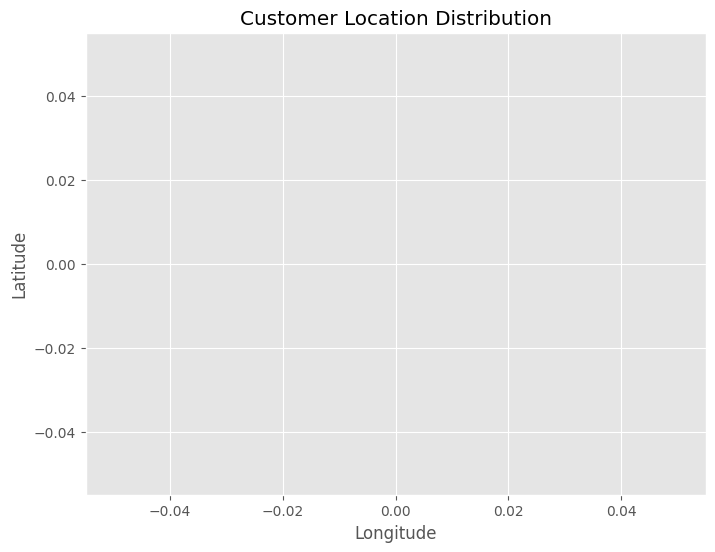

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(master["geolocation_lng"], master["geolocation_lat"], s=5)
plt.title("Customer Location Distribution")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()
